# Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Train.csv")
test =pd.read_csv("Test.csv")
train_original=train.copy()
test_original=test.copy()


# Understanding the data

In [3]:
train.shape , test.shape

((8523, 12), (5681, 11))

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset later in this project.

In [4]:
list(train.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [5]:
list(test.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict

In [6]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

 As we can see, there are 4 numeric and 7 categorical variables

In [7]:
# Combine train and test data.

test['Item_Outlet_Sales']=0
combined=train.append(pd.DataFrame(data=test),ignore_index=True)
combined.shape

(14204, 12)

In [8]:
null_columns=combined.columns[combined.isnull().any()]
combined[null_columns].isnull().sum()

Item_Weight    2439
Outlet_Size    4016
dtype: int64

In [9]:
combined[combined['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


Finding columns with null values in a df.

# Univariate Analysis : Continuous Variables


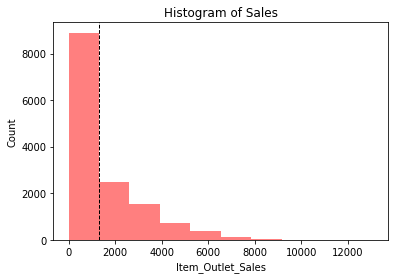

In [10]:
# Item_Outlet_Sales

combined['Item_Outlet_Sales'].plot.hist(color="R",alpha=0.5)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales')
plt.axvline(combined['Item_Outlet_Sales'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

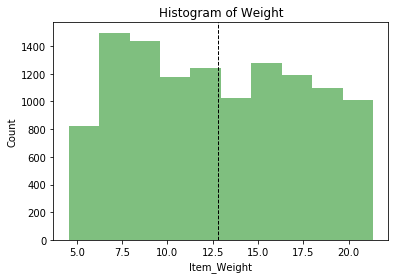

In [11]:
# Item_Weight

combined['Item_Weight'].plot.hist(color='G',alpha=0.5)
plt.xlabel('Item_Weight')
plt.ylabel('Count')
plt.title('Histogram of Weight')
plt.axvline(combined['Item_Weight'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.show()

There seems to be no clear-cut pattern in Item_Weight.

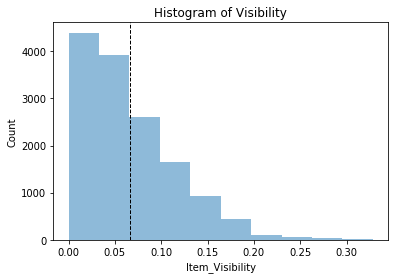

In [12]:
# Item_Visibility

combined['Item_Visibility'].plot.hist(alpha=0.5)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.title('Histogram of Visibility')
plt.axvline(combined['Item_Visibility'].mean(),color='black',linestyle='dashed',linewidth=1)
plt.show()

Item_Visibility is right-skewed and should be transformed to curb its skewness

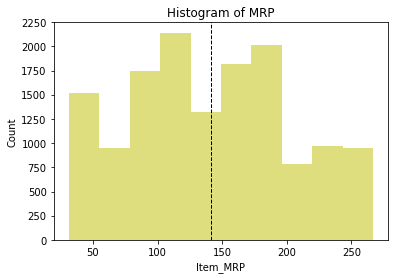

In [13]:
# Item_MRP

combined['Item_MRP'].plot.hist(color='Y',alpha=0.5)
plt.xlabel('Item_MRP')
plt.ylabel('Count')
plt.title('Histogram of MRP')
plt.axvline(combined['Item_MRP'].mean(),color='k',linestyle='dashed',linewidth=1)
plt.show()

There seems to be no clear-cut pattern in Item_Weight

# Univariate Analysis : Categorical Variables

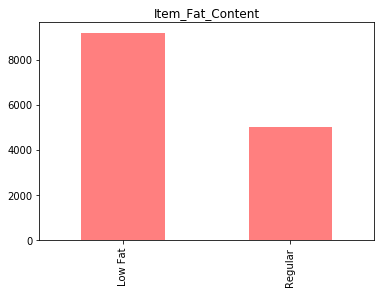

In [14]:
# Item_Fat_Content

combined['Item_Fat_Content'].replace(('LF','low fat'),'Low Fat',inplace=True)
combined['Item_Fat_Content'].replace('reg','Regular',inplace=True)
combined['Item_Fat_Content'].value_counts().plot.bar(title='Item_Fat_Content',color='R',alpha=0.5)
plt.show()



Sales of Low Fat products is higher than the products with Regular amount of Fat.

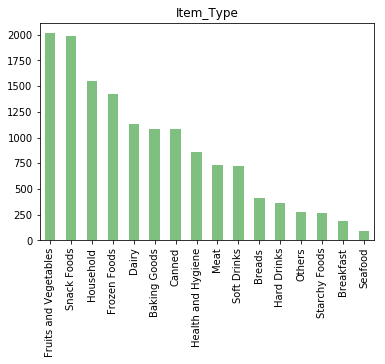

In [15]:
# Item_Type

combined['Item_Type'].value_counts().plot.bar(color='G',alpha=0.5)
plt.title('Item_Type')
plt.show()

"Fruits & Vegetables" and "Snack food" are the two most selling product category.

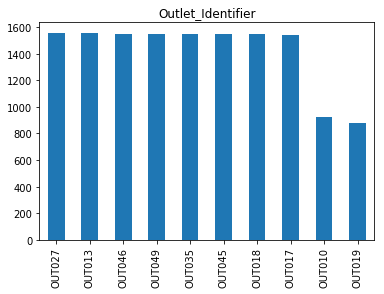

In [16]:
# Outlet_Identifier

combined['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Outlet_Identifier')
plt.show()

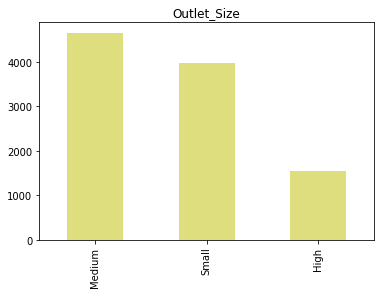

In [17]:
# Outlet_Size

combined['Outlet_Size'].value_counts().plot.bar(color='y',alpha=0.5)
plt.title('Outlet_Size')
plt.show()

In Outlet_Size’s plot, for 4016 observations, Outlet_Size is blank or missing.We will check for this in the bivariate analysis to substitute the missing values in the Outlet_Size.

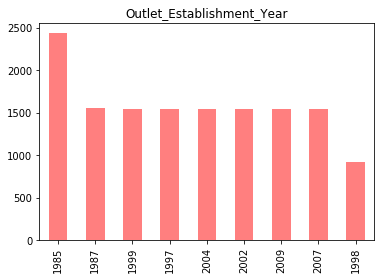

In [18]:
# Outlet_Establishment_Year

combined['Outlet_Establishment_Year'].value_counts().plot.bar(color='R',alpha=0.5)
plt.title('Outlet_Establishment_Year')
plt.show()

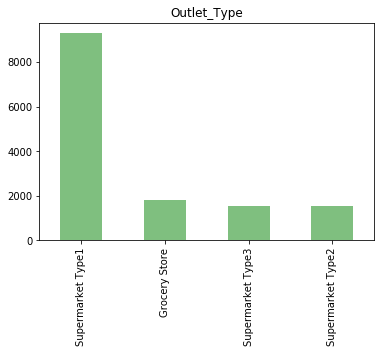

In [19]:
# Outlet_Type

combined['Outlet_Type'].value_counts().plot.bar(color='g',alpha=0.5)
plt.title('Outlet_Type')
plt.show()

Supermarket Type1 outlets have highest selling than other types of outlets.

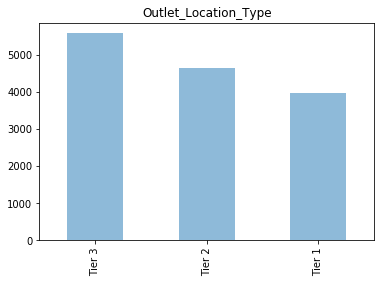

In [20]:
# Outlet_Location_Type

combined['Outlet_Location_Type'].value_counts().plot.bar(alpha=0.5)
plt.title('Outlet_Location_Type')
plt.show()

Maximum number of products are purchased in Tier 3 location type.

# Bivariate Analysis : Target Variable vs Independent Continuous Variables

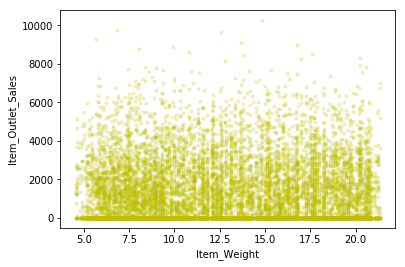

In [21]:
# Item_Weight vs Item_Outlet_Sales

plt.scatter(combined['Item_Weight'],combined['Item_Outlet_Sales'],marker ='.',alpha=0.2,color='y')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

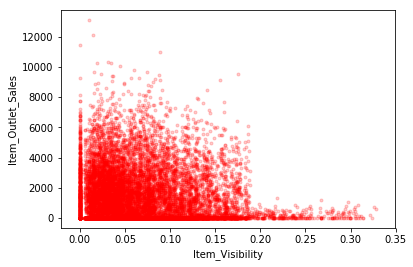

In [22]:
plt.scatter(combined['Item_Visibility'],combined['Item_Outlet_Sales'],marker='.',color='r',alpha=0.2)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

There is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.

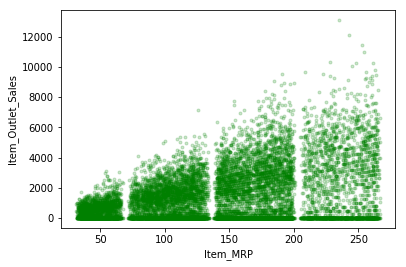

In [23]:
plt.scatter(combined['Item_MRP'],combined['Item_Outlet_Sales'],marker='.',color='g',alpha=0.2)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

# Bivariate Analysis : Target Variable vs Independent Categorical Variables

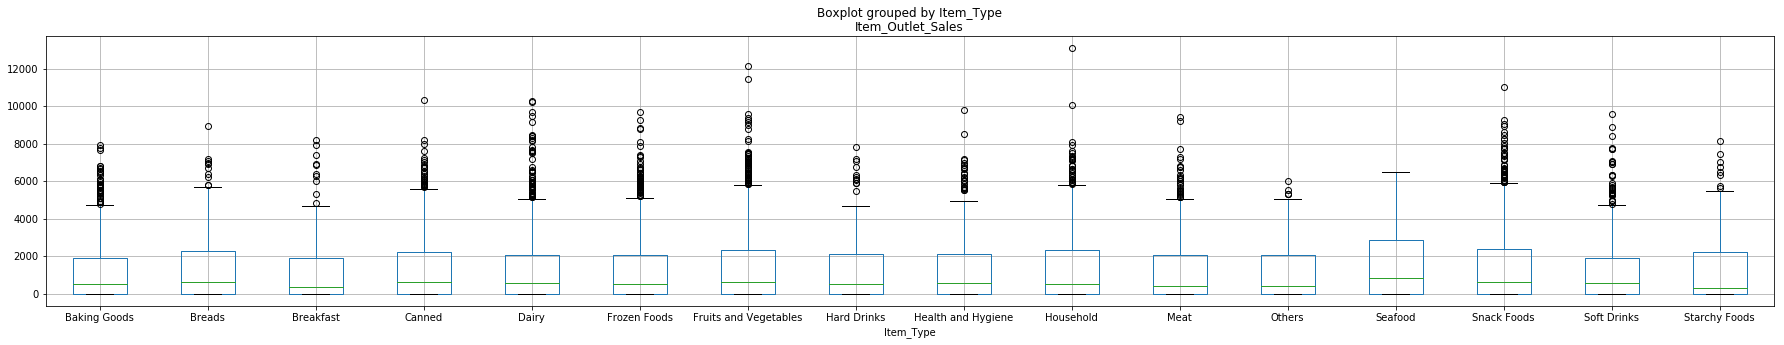

In [24]:
# Item_Outlet_Sales vs Item_Type

combined.boxplot(column='Item_Outlet_Sales',by='Item_Type',figsize=(30,5))
plt.show()

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.

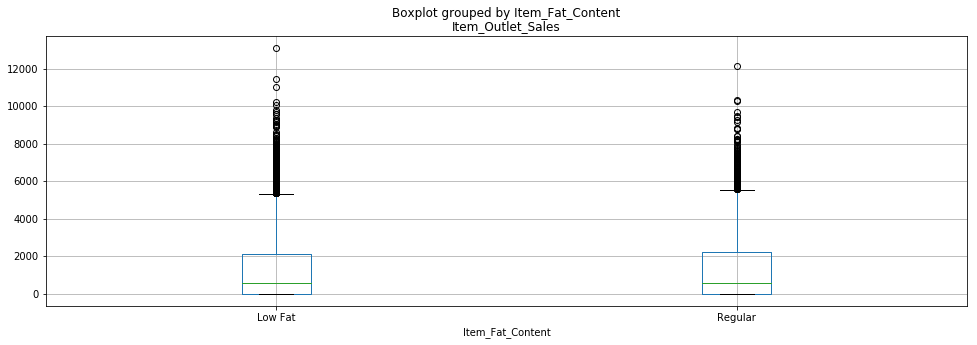

In [25]:
# Item_Outlet_Sales vs Item_Fat_Content
combined.boxplot(column="Item_Outlet_Sales",by='Item_Fat_Content',figsize=(16,5))
plt.show()

Distribution of Item_Outlet_Sales across the categories of Item_Fat_Content is also not very distinct.

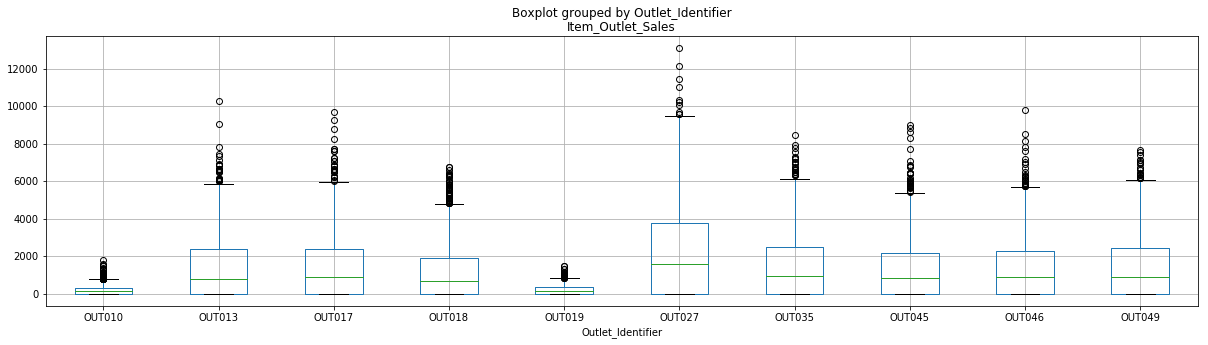

In [26]:
# Item_Outlet_Sales vs Outlet_Identifier
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Identifier',figsize=(20,5))
plt.show()

The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

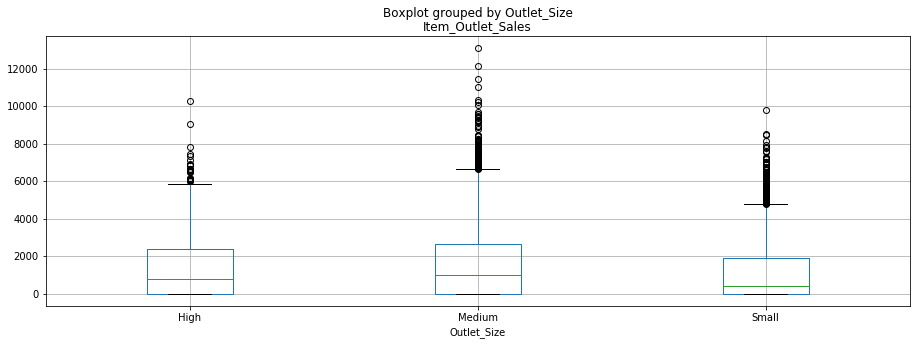

In [27]:
# Item_Outlet_Sales vs Outlet_Size
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(15,5))
plt.show()

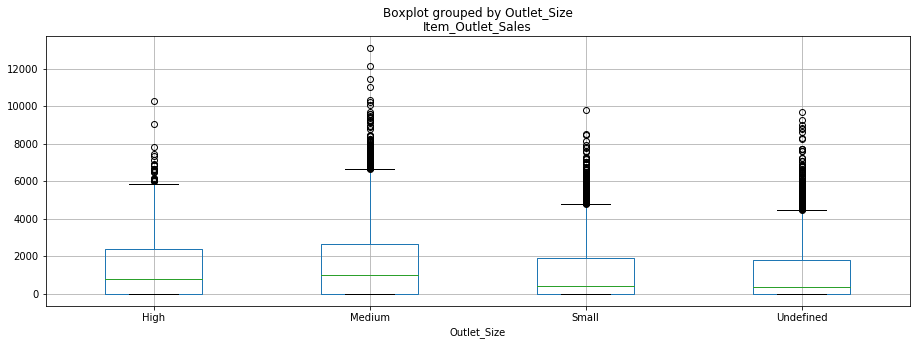

In [28]:
newcomb=combined
newcomb['Outlet_Size'].fillna('Undefined',inplace=True)
newcomb.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(15,5))
plt.show()

The distribution of ‘Small’ Outlet_Size is almost identical to the distribution of the "undefined" category of Outlet_Size. So, we can substitute the undefined in Outlet_Size with ‘Small’.

In [31]:
combined['Outlet_Size'].replace('Undefined','Small',inplace=True)

In [33]:
combined['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

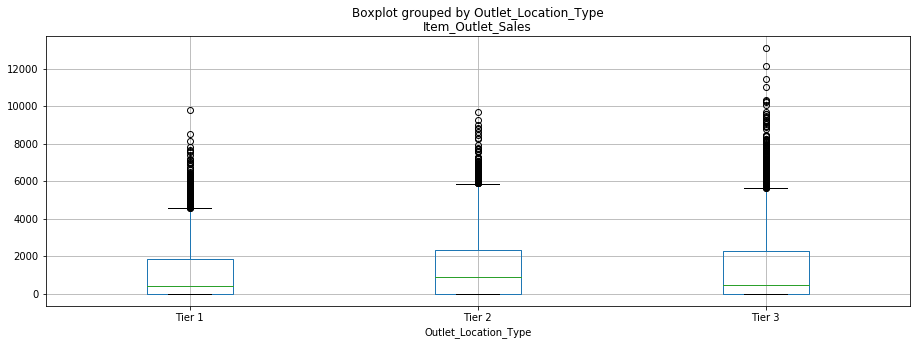

In [35]:
# Item_Outlet_Sales vs Outlet_Location_Type
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Location_Type',figsize=(15,5))
plt.show()

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.


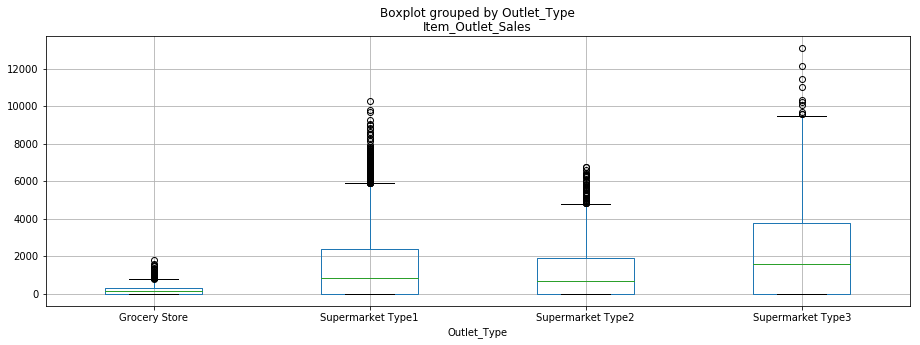

In [38]:
# Item_Outlet_Sales vs Outlet_Type
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Type',figsize=(15,5))
plt.show()

In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.